### Online Retail

****

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [3]:
df = pd.read_csv('../Data/OnlineRetail.csv', encoding = 'ISO-8859-1')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [34]:
# (1) Chọn mục tiêu Vẽ biểu đồ đường thể hiện xu hướng thay đổi số lượng đơn hàng theo thời gian trong năm 2011. 
# (2) Vẽ biểu đồ cột so sánh số lượng đơn hàng trong các tháng của năm 2011.
df.InvoiceDate = pd.to_datetime(df.InvoiceDate)

# Loc du lieu trung
d1 = df[['InvoiceNo', 'InvoiceDate']]
d1 = d1.drop_duplicates(subset = 'InvoiceNo', keep = 'first')
# d1 = d1.set_index(['InvoiceDate']) -- Not Available
print(d1)

d2 = d1[d1.InvoiceDate.dt.year == 2011]
d2 = d2.set_index(['InvoiceDate'])
d2 = d2.reset_index()
d3 = d2.groupby(by=d2['InvoiceDate'].dt.date).count()

       InvoiceNo         InvoiceDate
0         536365 2010-12-01 08:26:00
7         536366 2010-12-01 08:28:00
9         536367 2010-12-01 08:34:00
21        536368 2010-12-01 08:34:00
25        536369 2010-12-01 08:35:00
...          ...                 ...
541865    581583 2011-12-09 12:23:00
541867    581584 2011-12-09 12:25:00
541869    581585 2011-12-09 12:31:00
541890    581586 2011-12-09 12:49:00
541894    581587 2011-12-09 12:50:00

[25900 rows x 2 columns]


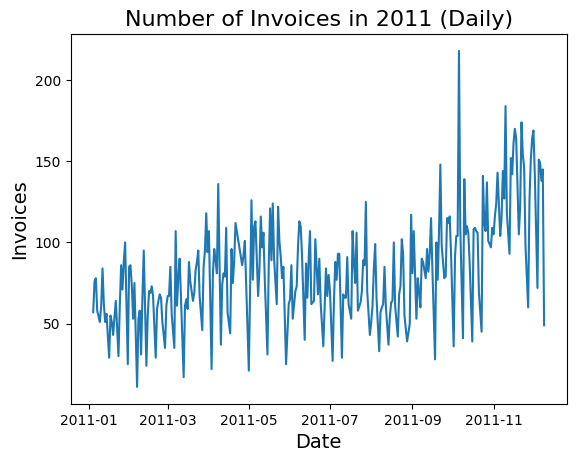

In [46]:
# Dung Groupby thi index tra ve la gia tri duoc Groupby
x = d3.index.get_level_values(0)
plt.plot(x, d3['InvoiceDate'])
plt.title('Number of Invoices in 2011 (Daily)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Invoices', fontsize=14)
plt.show()

In [47]:
d4 = d2.groupby(by=d2['InvoiceDate'].dt.month).count()
print(d4)

             InvoiceDate  InvoiceNo
InvoiceDate                        
1                   1476       1476
2                   1393       1393
3                   1983       1983
4                   1744       1744
5                   2162       2162
6                   2012       2012
7                   1927       1927
8                   1737       1737
9                   2327       2327
10                  2637       2637
11                  3462       3462
12                  1015       1015


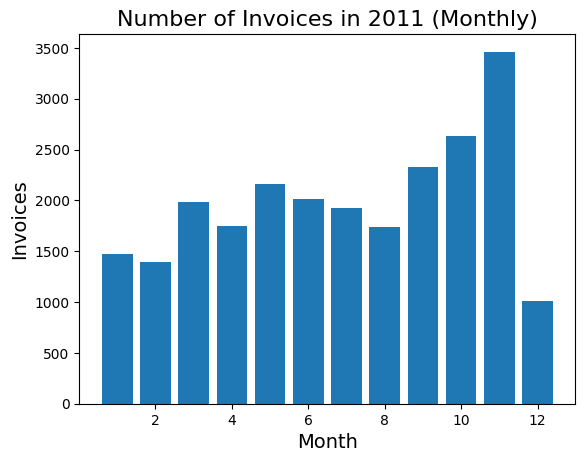

In [48]:
x = d4.index.get_level_values(0)
plt.bar(x, d4.InvoiceDate)
plt.title('Number of Invoices in 2011 (Monthly)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Invoices', fontsize=14)
plt.show()